In [1]:
import gym
import itertools
import matplotlib.style
import numpy as np
import sys
from helper import plot_rewards, plot_iters
from collections import defaultdict, namedtuple
import random
from IPython.display import clear_output
matplotlib.style.use('dark_background')
np.random.seed(420)

In [2]:
env = gym.make('FrozenLake-v0')
print('No. of actions: ', env.nA)
print('No. of states: ', env.nS)
env.render()

No. of actions:  4
No. of states:  16

SFFF
FHFH
FFFH
HFFG


In [3]:
def greedyEpsilon(Q, eps, num_a):
    def nest(s):
        probA = np.ones(num_a) * eps / num_a
        bestA = np.argmax(Q[s])
        probA[bestA] += (1.0 - eps)
        return probA
    return nest

In [4]:
def qLearning(env, episodes, discount = 0.95, alpha = 0.6, eps = 0.1):

    Q = defaultdict(lambda: np.zeros(env.nA))
    test_r = []
    wut = []
    iters2 = []
    test = []
    policy = greedyEpsilon(Q, eps, env.nA)
    for episode in range(episodes):
        #env.render()
        #print('Episode:',episode)
        r=0
        s = env.reset()
        i2 = 0
        for t in itertools.count():
            probA = policy(s)
            a = np.random.choice(np.arange(len(probA)),p = probA)
            s_prime, reward, done, _ = env.step(a)
            r += reward   
            best_next_a = np.argmax(Q[s_prime])    
            td_target = reward + discount * Q[s_prime][best_next_a]
            td_delta = td_target - Q[s][a]
            Q[s][a] += alpha * td_delta
            i2 += t
            
            if done:
                break
                
            s = s_prime
        print(r)
        iters2.append(i2)
        test_r.append(r)
        clear_output(wait=True)
    wut = np.cumsum(test_r)/np.arange(1,episodes+1)
    iters3 = np.cumsum(iters2)/np.arange(1,episodes+1)
    return Q, wut, iters3

In [5]:
Q, rewards, iters = qLearning(env, 25000)

0.0


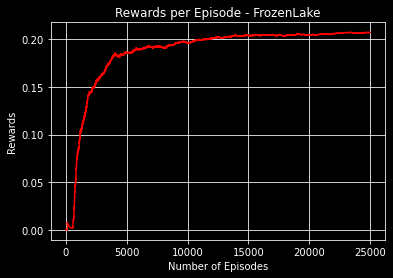

In [6]:
plot_rewards(rewards, 'Rewards per Episode - FrozenLake','Rewards')

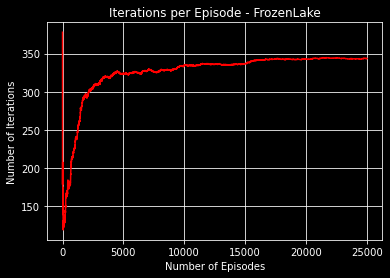

In [7]:
plot_iters(iters, 'Iterations per Episode - FrozenLake', 'Number of Iterations')

In [42]:
Qlist = []
for i in range(len(Q)):
    Qlist.append(Q[i])
a2w = {0:'<', 1:'v', 2:'>', 3:'^'}
policy_arrows = [a2w[x] for x in np.argmax(Qlist, axis=-1)]
print(np.array(policy_arrows).reshape([-1, 4]))

[['v' '^' '<' '^']
 ['<' '<' '>' '<']
 ['^' '>' '<' '<']
 ['<' '>' 'v' '<']]
